# Ultrasound Propagation in Homogeneous Media

To understand functional ultrasound imaging, we first have to understand the basic physics of ultrasound. In ultrasound imaging, we use piezoelectric transducers (transducer = acts as both an emitter and a receiver) to both create ultrasound waves in a medium and measure the backscatter of that ultrasound. 

Although we can treat the imaging process as a black box---you don't need to understand Maxwell's equations to use a camera---, understand where the signal comes from will help us understand how to get the most out of this modality.

## Sound in 1D

Let's build up our understanding of ultrasound by thinking about how compression waves propagate in water. Imagine a 1-dimensional volume of water (i.e. a tiny friction-less pipe with cross-area $A$) that's homogeneous. We suddenly push down a piston at x = 0, t = 0 by pushing a piston. Because there's an increase in density, the excess water will flow out to the left and right. Those new areas of increased density will then themselves push on the water to their left or right, creating a propagating wave of compression through the liquid. This is sound.

<img src="images/1d_vol.png" width="612">


## The wave equation

To figure out how the wave will propagate, we can use basic considerations about conservation of mass. We have:

* $\rho(x, t)$ is the density of the liquid (e.g. in $kg/m^3$). The density only varies a tiny amount above its baseline value, hence $\rho = \rho_0 + \rho'(x, t)$, where the $|\rho'| << \rho$.
* $u(x, t)$ is the velocity of the liquid (e.g. in m/s)
* $p(x, t)$ is the pressure experienced by the liquid (e.g. in pascals, $N/m^2$). Again $p = p_0 + p'(x, t)$, with $|p'| << p_0$.

By conservation of mass, no liquid is lost or created. The amount of liquid that flows through a section of the pipe is $A \rho \cdot u$, where A is the cross-section of the pipe. Hence the density change is given by the net outflow, $- \frac{\partial (\rho u)}{\partial x}$. Thus we have:

$$\frac{\partial \rho}{\partial t} = - \frac{\partial (\rho u)}{\partial x}$$

Assuming small modulations of density from baseline, we can drop the second order terms, and obtain this equation in terms of the change in density:

$$\boxed{\frac{\partial \rho'}{\partial t} + \rho_0 \frac{\partial  u}{\partial x} = 0}$$

<img src="images/conservation_of_mass.png" width="716">

Similarly, we can look at the forces in the liquid and derive another equation from Newton's second law. The net force felt by the liquid is proportional to the spatial derivative of the pressure:

$$F_{net} = -A \frac{\partial p}{\partial x} dx$$

The acceleration $a$ felt by a particle is given by the total derivative:

$$a = \frac{Du}{Dt} = \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}$$

When we're thinking about a static fluid, the second (convective) term is negligible. Hence, from $F = ma$:

$$-A \frac{\partial p}{\partial x} dx \approx \rho A dx \frac{\partial u}{\partial t}$$

Ignoring the second order terms again, we obtain:

$$\boxed{-\frac{\partial p'}{\partial x} = \rho_0 \frac{\partial u}{\partial t}}$$

<img src="images/newtons_law.png" width="749">

Finally, we need an equation of state. In linear acoustics, we assume that we're near equilibrium (barotropic/adiabatic), and small perturbations in density increase the pressure linearly:

$$p' = \left(\frac{\partial p}{\partial \rho}\right)_s \rho'$$

The constant of proportionality turns out to be $(\frac{\partial p}{\partial \rho})_s = c^2$, where $c$ is the speed of sound in the medium.

Hence:

$$\boxed{p' \equiv c^2\rho'}$$

We take the temporal derivative of the first equation and the spatial derivative of the second equation to eliminate the cross-derivatives: $\frac{\partial}{\partial t} \frac{\partial u}{\partial x}$:

$$\frac{\partial }{\partial t}\frac{\partial \rho'}{\partial t} = \frac{\partial }{\partial x} \frac{\partial p'}{\partial x}$$

And finally using the equation of state:

$$\boxed{\frac{\partial^2 p'}{\partial t^2} = c^2 \frac{\partial^2 p'}{\partial x^2}}$$

We note that we can derive identical wave equations for density or velocity. It's wave equations all the way down!


## Solving the one-dimensional wave equation

Assuming that the initial pressure delta at time 0 is $f(x)$, we have that:

$$p'(x, t) = \frac{1}{2}[f(x - ct) + f(x + ct)]$$

We can verify this by:

1. Noticing that at t = 0, we get back our initial condition ($p'(x, 0) = f(x)$) *and*
2. Plugging each half of the equation back into the wave equation and verifying that each half satisfies the equation

Now for our situation of pressing down a piston at time t=0, we have $f(x) = \delta(x)$, and our little blip of pressure propagates to the left and right. A wave!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
c = 1540  # Speed of sound in water (m/s)
L = 0.05  # Field of view (m) - 5 cm total
x_range = L / 2  # ±2.5 cm

# For animation
duration = 4.0  # seconds of animation
fps = 25  # frames per second
n_frames = int(duration * fps)  # 100 frames

# Time for wave to travel from center to edge
t_physical = x_range / c  # ~16.2 microseconds

# Create spatial grid
x = np.linspace(-x_range, x_range, 500)

# Initial condition: Gaussian pulse at x=0
sigma = 0.001  # 2 mm width
f = lambda x: np.exp(-x**2 / (2 * sigma**2))

# Setup figure
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(-x_range, x_range)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Pressure perturbation (normalized)')
ax.set_title('1D Wave Propagation: d\'Alembert Solution')
ax.grid(True, alpha=0.3)

# Add vertical line at origin
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5, label='Initial position')

line, = ax.plot([], [], 'b-', linewidth=2, label='Wave')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax.legend()

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(frame):
    # Physical time corresponding to this frame
    t = (frame / n_frames) * t_physical
    
    # d'Alembert solution: p'(x,t) = 0.5[f(x-ct) + f(x+ct)]
    p = 0.5 * (f(x - c * t) + f(x + c * t))
    
    line.set_data(x, p)
    time_text.set_text(f'Time: {t*1e6:.1f} μs\nPosition: ±{c*t*100:.2f} cm')
    return line, time_text

anim = FuncAnimation(fig, animate, init_func=init, frames=n_frames, 
                     interval=1000/fps, blit=True, repeat=True)

plt.close()  # Prevent static plot from showing
HTML(anim.to_jshtml())

## The n-dimensional wave equation

We can generalize this to multiple dimensions (2 or 3) and obtain:

$$\boxed{\frac{\partial^2 p'}{\partial t^2} = c^2 \nabla^2 p'}$$

## Sound propagation speed in water

Sound propagates in tissues like the brain at 1540 m/s. This also turns out to be similar to the speed of sound in salt water at 38C, so we'll use the two "speed of sound in water" and "speed of sound in tissue" interchangeably. Importantly, 1540 m/s >> 330 m/s, the speed of sound in air. That means that sound propagates poorly from water to air and vice-versa.

## A transducer blip on the edge of a 2d volume

<img src="images/geometry.png" width="569">

Suppose now that we have an ultrasonic transducer on the edge of a 2d volume. We assume that the transducer is a piezoelectric element that we drive with alternating current at a given  frequency, $f = \frac{\omega}{2\pi}$. This will cause the transducer to expand and contract in the z dimension, pushing the water along it.

The transducer has a non-zero spatial footprint. How will the compression and expansion it creates propagate?

## Solving the wave equation

To solve the equation, we take a guess and check approach. We guess that solutions take the form:

$$p'(x, z, t) = \mathbf{Re}\{P(x, z) \exp(-i \omega t))\}$$

Plugging that back in to the wave equation, we find:

$$\frac{\partial^2 p'}{\partial t^2} = -\omega^2 p'$$

And:

$$(\nabla^2 + k^2) P(x, z) = 0$$

With $k = \frac{\omega}{c}$. This is the Helmholtz form of the wave equation.

## Boundary conditions

The piston is moving up and down in the z dimension, hence imposes that the $z$ velocity at the boundary of the liquid is:

$$u(x, t) = \mathbf{Re}\{f(x) \exp(-i\omega t)\}$$

Here, f(x) is the spatial profile of the transducer. If it's a square piston centered at $x=0$ with width $w$ moving back and forth in the z direction with a maximum amplitude $f_0$, then:

$$
f(x) = 
\begin{cases}
f_0, & |x| \le \dfrac{w}{2} \\
0,   & \text{otherwise.}
\end{cases}
$$

We can plug $u(x, t)$ into our second equation of state, and find that:

$$-i \omega \rho f(x) = -\frac{\partial p'}{\partial z}$$

## Fourier land

We start by doing a spatial Fourier transform in the $x$ direction on our solution:

$$\tilde P(k_x, z) = \int_{-\infty}^{\infty}P(x, z) \exp(-ik_xz) dx$$

In Fourier space, the second spatial derivative $\frac{\partial P}{\partial x} = -k_x^2$, and we get the following wave equation:

$$(-k_x^2 + \frac{d^2}{dz^2} + k^2) \tilde P = 0$$

Define $k_z = \sqrt{k^2-k_x^2}$. Then we can check that this is a solution to the equation:

$$\tilde P(k_x, z) = A(k_x)\exp(ik_zz)$$

But what's the value of $A(k_x)$? For that, we can take the partial derivative in z dimension:

$$ \frac{\partial{\tilde P(k_x, z)}}{\partial z} = A(k_x) i k_z \exp(ik_zz) $$

Evaluate this at $z=0$:

$$ \frac{\partial{\tilde P(k_x, z)}}{\partial z}\|_{z=0} = A(k_x) i k_z $$

Plugging back in the boundary condition: 

$$i k_z A(k_x) = i \omega \rho \tilde f(k_x)$$

Which means that:

$$A(k_x) = \frac{\omega \rho \tilde f(k_x)}{k_z}$$

Thus:

$$\tilde P(k_x, z) = \frac{\omega \rho \tilde f(k_x)}{k_z} \exp(ik_zz)$$

And we can recover the solution in real space using the inverse Fourier transform:

$$P(x, z) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \frac{\omega \rho \tilde f(k_x)}{k_z} \exp(ik_zz) exp(ik_xx) dk_x$$

## Big picture

That was a lot of algebra to go through, but it shows us from scratch how solutions for the wave equation can be computed:

- Calculate the Fourier transform of the piston
- Weigh it by factors depending on spatial modes
- Take the inverse Fourier transform

This method of solving the wave equation is sometimes known as the angular spectrum approach (ASA) in the literature. Although more heavyweight simulation methods can handle changing densities and arbitrary geometries, ASA is very fast to simulate and allows us to play around with the equations to gain some intuition.

If you've taken optics before, you'll notice that this looks like calculating the diffraction pattern from light propagating through a slit. Indeed, it's not coincidence---both phenomena are described by the same equations.



# The diffraction pattern from a square piston

With that out of the way, let's calculate the pressure wave that comes from a transducer moving up and down at a frequency $f = 2 MHz$. It will look like a diffraction pattern.

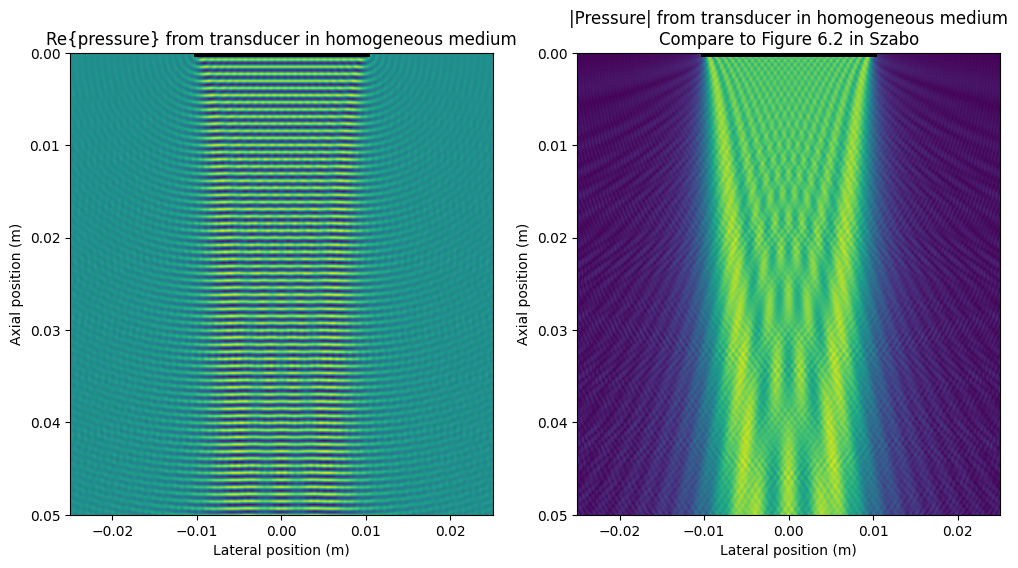

In [2]:
import scipy.ndimage
import numpy as np

c = 1540  # Speed of sound in water (m/s)
omega = 2 * np.pi * 2e6 # In MHz
rho = 1000  # Density of medium in kg/m^3

wavelength = c / (omega / (2 * np.pi))
transducer_size = .02

# Size of each side of the volume to simulate
L = 101e-3
n_points = 1024

z_range = np.linspace(0, L, n_points)
x_range = np.linspace(-L/2, L/2, n_points)

# Transducer shape
f = 1.0 * ((x_range >= -transducer_size/2) & (x_range <= transducer_size/2))

f_tilde = np.fft.fft(f)
kx = np.fft.fftfreq(n_points, d=(x_range[1] - x_range[0])) * 2 * np.pi
k = omega / c
kz = np.sqrt((k**2 - kx**2).astype(np.complex128)).reshape(1, -1)

P = np.fft.ifft(f_tilde.reshape((1, -1)) * (omega * rho) / kz * np.exp(1j * kz.reshape(1, -1) * z_range.reshape((-1, 1))), axis=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(np.abs(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("|Pressure| from transducer in homogeneous medium\nCompare to Figure 6.2 in Szabo")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

plt.subplot(1, 2, 1)
plt.imshow(np.real(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("Re{pressure} from transducer in homogeneous medium")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

Notice on the left that the pressure field looks *almost* like a plane wave under the transducer. However, a look at the absolute value of the pressure (that is, the maximum absolute deviation of the pressure over a cycle at angular frequency $\omega$) reveals fringes, indicative of interference. This is the infamous diffraction pattern.

Let's animate this over time.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Animation parameters
duration = 0.6  # seconds of animation
fps = 25  # frames per second
n_frames = int(duration * fps)  # 100 frames

# Time range for one complete cycle
t_range = np.linspace(0, 2 * np.pi / omega, n_frames)

# Setup figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(x_range[0], x_range[-1])
ax.set_ylim(z_range[-1], z_range[0])
ax.set_xlabel('Lateral position (m)')
ax.set_ylabel('Axial position (m)')
ax.set_title('Oscillating Pressure Field from Piston Transducer')

# Initialize image plot
im = ax.imshow(np.real(P), 
               extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], 
               aspect='auto', cmap='RdBu_r', vmin=-np.max(np.abs(P)), 
               vmax=np.max(np.abs(P)))
plt.xlim(-.0125, .0125)
plt.ylim(0.025, 0)
plt.colorbar(im, ax=ax, label='Pressure (real part)')

# Add transducer indicator
transducer_y = z_range[0] + (z_range[-1] - z_range[0]) * 0.005
transducer_line, = ax.plot([-transducer_size/2, transducer_size/2], [transducer_y, transducer_y], 
                            'k-', linewidth=4, label='Transducer')
ax.legend(loc='lower right')

# Time text
time_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

def init():
    im.set_array(np.real(P))
    time_text.set_text('')
    return im, time_text

def animate(frame):
    t = t_range[frame]
    
    # Apply time-varying phase
    field = np.real(P * np.exp(-1j * omega * t))
    
    # Update image
    im.set_array(field)
    
    # Update time text
    phase = (omega * t) % (2 * np.pi)
    time_text.set_text(f'Phase: {phase:.2f} rad\nt = {t*1e6:.2f} μs')
    
    return im, time_text

anim = FuncAnimation(fig, animate, init_func=init, frames=n_frames, 
                     interval=1000/fps, blit=True, repeat=True)

plt.close()  # Prevent static plot from showing
HTML(anim.to_jshtml())

# Apodization

We see a lot of fringing and interference under the plane. One way to suppress this is to use less pressure on the sides of the transducer and more pressure in the center. Thus:

$$
f(x) = 
\begin{cases}
f_0 H(\frac{2x}{w}), & |x| \le \dfrac{w}{2} \\
0,   & \text{otherwise.}
\end{cases}
$$

Where the window function $H$ is a smooth symmetric function such that $H(0) > H(-1)$, for example a Hamming window. 

In practice, rather than a single monolithic transducer, we'll use a grid of individually controllable transducers, allowing us to individually control the amplitude of the oscillations.

<img src="images/geometry_with_array.png" width="589">

Using an apodization window during transmit suppresses side-lobes during transmission, at the cost of decreasing the effective beam width, and therefore field of view. Here's the results with a a Hamming window.

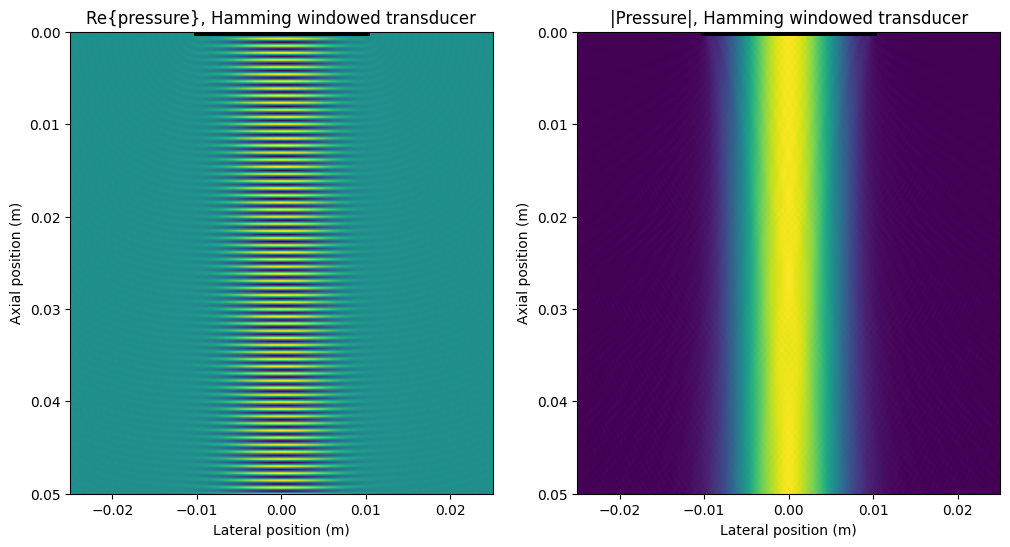

In [4]:
# Transducer shape
f = 1.0 * ((x_range >= -transducer_size/2) & (x_range <= transducer_size/2))
f[f > 0] = scipy.signal.windows.hamming(np.sum(f > 0))

f_tilde = np.fft.fft(f)
kx = np.fft.fftfreq(n_points, d=(x_range[1] - x_range[0])) * 2 * np.pi
k = omega / c
kz = np.sqrt((k**2 - kx**2).astype(np.complex128)).reshape(1, -1)

P = np.fft.ifft(f_tilde.reshape((1, -1)) * (omega * rho) / kz * np.exp(1j * kz.reshape(1, -1) * z_range.reshape((-1, 1))), axis=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.real(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("Re{pressure}, Hamming windowed transducer")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("|Pressure|, Hamming windowed transducer")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

Under the transducer, we get an approximately perfect plane wave.

# Steering the beam

By controlling the *amplitude* of the oscillations of the transducer array, we can control the shape of the transmitted wave. By controlling the *phase* of the tranducers, we can steer the waves.

To steer the beam by an angle $\alpha$, we add a continuously changing phase shift to the transducer:

$$\phi = \frac{\omega}{c} \sin \alpha x$$

This can be derived from geometric considerations.

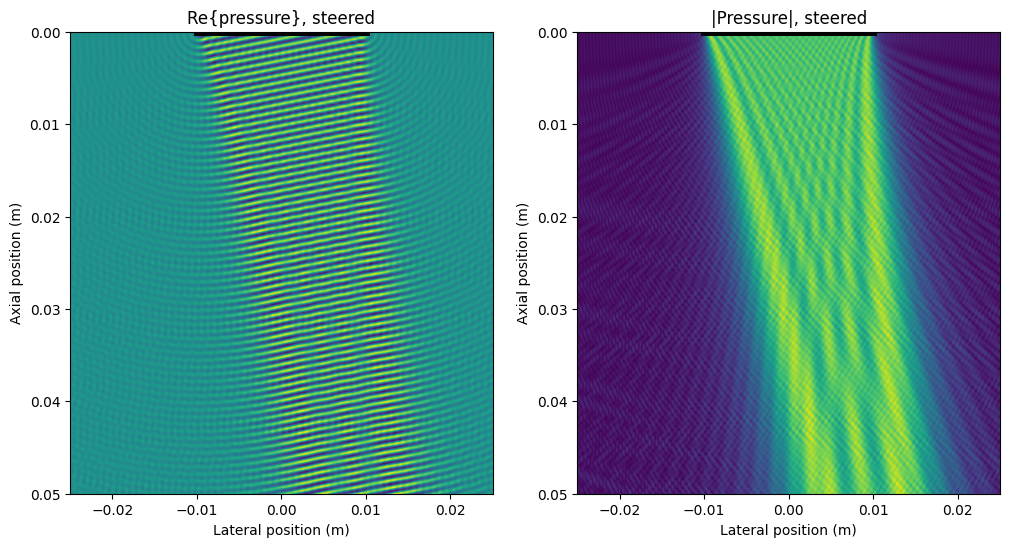

In [5]:
alpha = 10  # Steering angle in degrees
# Transducer shape
f = 1.0 * ((x_range >= -transducer_size/2) & (x_range <= transducer_size/2)) * np.exp(1j * (omega / c) * np.sin(np.deg2rad(alpha)) * x_range)
#f[f > 0] = scipy.signal.windows.hamming(np.sum(f > 0))

f_tilde = np.fft.fft(f)
kx = np.fft.fftfreq(n_points, d=(x_range[1] - x_range[0])) * 2 * np.pi
k = omega / c
kz = np.sqrt((k**2 - kx**2).astype(np.complex128)).reshape(1, -1)

P = np.fft.ifft(f_tilde.reshape((1, -1)) * (omega * rho) / kz * np.exp(1j * kz.reshape(1, -1) * z_range.reshape((-1, 1))), axis=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.real(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("Re{pressure}, steered")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("|Pressure|, steered")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

# Focusing the beam at a specific depth

Suppose instead we want to focus the beam at a depth $z_f$. To do that, we can again use geometric considerations, and add a phase offset to the transductor array:

$$\phi = -\frac{\omega}{c} \sqrt{z_f^2 + x^2}$$

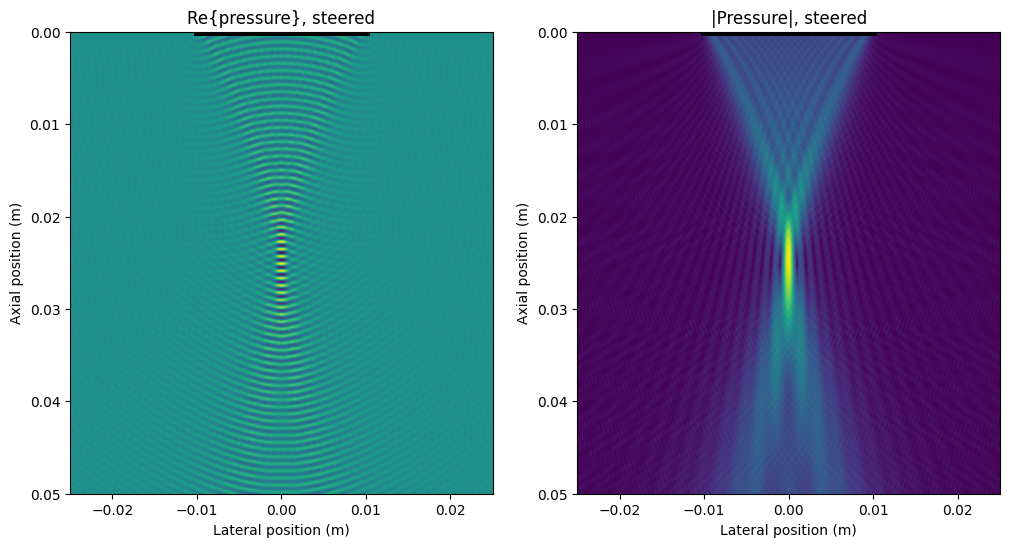

In [6]:
z_f = .025
# Transducer shape
f = 1.0 * ((x_range >= -transducer_size/2) & (x_range <= transducer_size/2)) * np.exp(-1j * (omega / c) * np.sqrt(z_f**2 + x_range**2))
#f[f > 0] = scipy.signal.windows.hamming(np.sum(f > 0))

f_tilde = np.fft.fft(f)
kx = np.fft.fftfreq(n_points, d=(x_range[1] - x_range[0])) * 2 * np.pi
k = omega / c
kz = np.sqrt((k**2 - kx**2).astype(np.complex128)).reshape(1, -1)

P = np.fft.ifft(f_tilde.reshape((1, -1)) * (omega * rho) / kz * np.exp(1j * kz.reshape(1, -1) * z_range.reshape((-1, 1))), axis=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.real(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("Re{pressure}, steered")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("|Pressure|, steered")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

# Changes over time

Thus far, we've only looked at the steady state of the pressure when driving transducers at a single frequency (albeit with varying phase and amplitude). What if instead of driving our transducers with sine waves, we drove them with arbitrary waveforms? We could, for instance, propagate a short burst of ultrasound through the volume. But how do we simulate that?

If we drive the transducers with arbitrary waveforms:

$$f(x, t)$$

We can do a Fourier transform in time:

$$\tilde f(x, \omega)$$

Because the wave equation is linear, we can propagate each of the Fourier modes $\omega$ individually and add them back together. 

Let's illustrate this for a short burst of energy inside a Gaussian envelope:

$$f(x, t) = H(x) \exp(-i\omega_0 t) \exp(-\frac{t^2}{2 \sigma^2})$$

/var/folders/vz/6yxqzl6j5g384z7j_3pj2p1m0000gn/T/ipykernel_20417/1842631303.py:53: RuntimeWarning: invalid value encountered in divide
  transfer_function = (omega_range[:, np.newaxis, np.newaxis] * rho /


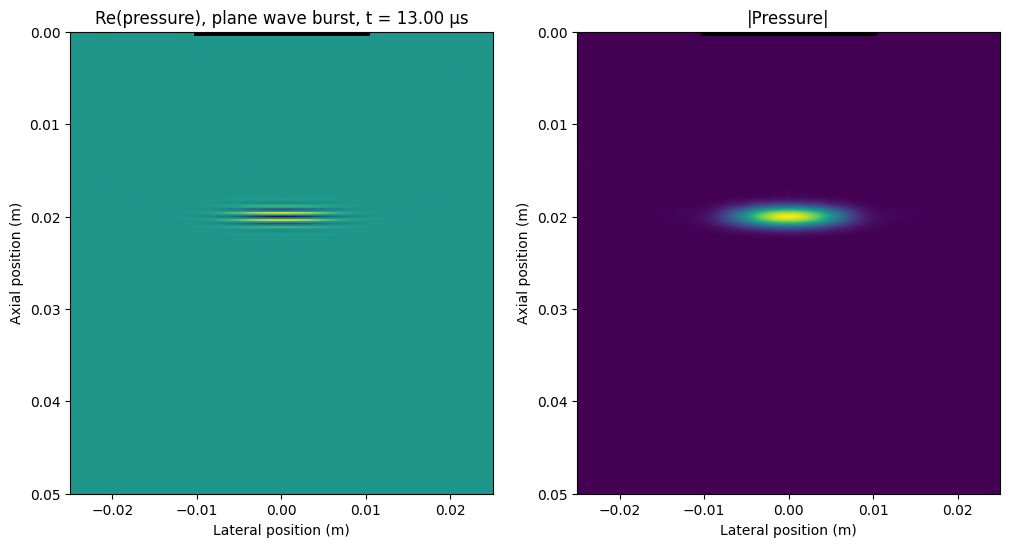

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def propagate_waveform(f_spacetime, c=1540, rho=1000, x_range=None, z_range=None, t_range=None):
    """
    Propagate an arbitrary time-varying waveform using the Angular Spectrum Approach.
    
    Parameters:
    -----------
    f_spatial : array
        Spatial shape of the transducer (amplitude at each x position)
    t: float
        Time point to evaluate the propagated field
    c : float
        Speed of sound (m/s)
    rho : float
        Density of medium (kg/m^3)
    x_range : array
        Lateral positions (m)
    z_range : array
        Axial positions (m)
    t_range : array
        Time points corresponding the input waveform
        
    Returns:
    --------
    P_t : array of shape (n_time, n_z, n_x)
        Complex pressure field at each time point
    """
    n_time = len(t_range)
    n_x = len(x_range)
    n_z = len(z_range)
    
    # Spatio-temporal Fourier transform
    f_spacetime_tilde = np.fft.fft(np.fft.fft(f_spacetime, axis=1), axis=0)
    
    kx = np.fft.fftfreq(n_x, d=(x_range[1] - x_range[0])) * 2 * np.pi
    
    # Frequency domain
    omega_range = np.fft.fftfreq(n_time, d=(t_range[1] - t_range[0])) * 2 * np.pi
    
    # Compute k and kz for all frequencies at once
    # Shape: (n_omega,)
    k = omega_range / c
    
    # Shape: (n_omega, n_kx)
    kz = np.sqrt((k[:, np.newaxis]**2 - kx[np.newaxis, :]**2).astype(np.complex128))
    
    # Propagation for all frequencies and all z positions at once
    # Shape: (n_omega, n_z, n_kx)
    transfer_function = (omega_range[:, np.newaxis, np.newaxis] * rho / 
                        kz[:, np.newaxis, :] * 
                        np.exp(1j * kz[:, np.newaxis, :] * z_range[np.newaxis, :, np.newaxis]))
    
    # Apply spatial shape and inverse FFT in x
    # Shape: (n_omega, n_z, n_x)
    P_omega = np.fft.ifft(f_spacetime_tilde[:, np.newaxis, :] * transfer_function, axis=2)

    # Remove the DC component
    P_omega[0, :, :] = 0

    # Now add them up over frequencies to get time domain
    P_t = np.fft.ifft(P_omega, axis=0)

    return P_t, t_range

# Parameters
c = 1540  # Speed of sound in water (m/s)
f0 = 2e6  # Center frequency 2 MHz
omega0 = 2 * np.pi * f0
rho = 1000  # Density of medium in kg/m^3

wavelength = c / f0
transducer_size = .02

# Spatial grid
L = 0.05
n_points = 256
z_range = np.linspace(0, L, n_points)
x_range = np.linspace(-L/2, L/2, n_points)

# Time parameters for the Gaussian burst
sigma_t = 1 / f0  # Width of Gaussian envelope (3 cycles)
t_span = 1.2 * L / c # Total time span to simulate, use the time to cross the simulation depth to prevent wrap-around
n_time = 512  # Number of time samples
t_range = np.linspace(-t_span/2, t_span/2, n_time)

# Transducer spatial shape (Hamming window for realistic apodization)
f_spatial = 1.0 * ((x_range >= -transducer_size/2) & (x_range <= transducer_size/2))
f_spatial[f_spatial > 0] = np.hamming(np.sum(f_spatial > 0))

# Create Gaussian-enveloped burst in time domain at each spatial position
# Shape: (n_time, n_x)
time_signal = np.exp(-t_range[:, np.newaxis]**2 / (2 * sigma_t**2)) * np.exp(-1j * omega0 * t_range[:, np.newaxis])
f_spacetime = f_spatial[np.newaxis, :] * time_signal

t_delta = .02 / 1540 # The burst after propagating for 2 cm in the medium
t_delta = 0.02 / 1540# 1 cm

P_all, t_range = propagate_waveform(f_spacetime=f_spacetime, c=c, rho=rho, x_range=x_range, z_range=z_range, t_range=t_range)
best_index = np.argmin(np.abs(t_range - t_delta))

P = P_all[best_index]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.real(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("Re(pressure), plane wave burst, t = {:.2f} μs".format(t_range[best_index]*1e6))
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(P), extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], aspect='auto')
plt.title("|Pressure|")
plt.xlabel("Lateral position (m)")
plt.ylabel("Axial position (m)")
plt.xlim(-.025, .025)
plt.ylim(0.05, 0)

plt.plot([-transducer_size/2, transducer_size/2], [0, 0], 'k-', linewidth=5, label='Transducer')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Animation parameters
fps = 25  # frames per second
skip_frames = 10
n_frames = P_all.shape[0] // skip_frames  # 100 frames

# Setup figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(x_range[0], x_range[-1])
ax.set_ylim(z_range[-1], z_range[0])
ax.set_xlabel('Lateral position (m)')
ax.set_ylabel('Axial position (m)')
ax.set_title('Plane wave burst')

# Initialize image plot
im = ax.imshow(np.real(P_all[0]), 
               extent=[x_range[0], x_range[-1], z_range[-1], z_range[0]], 
               aspect='auto', cmap='RdBu_r', vmin=-np.max(np.abs(P)), 
               vmax=np.max(np.abs(P)))
plt.xlim(-.0125, .0125)
plt.ylim(0.025, 0)
plt.colorbar(im, ax=ax, label='Pressure (real part)')

# Add transducer indicator
transducer_y = z_range[0] + (z_range[-1] - z_range[0]) * 0.005
transducer_line, = ax.plot([-transducer_size/2, transducer_size/2], [transducer_y, transducer_y], 
                            'k-', linewidth=4, label='Transducer')
ax.legend(loc='lower right')

# Time text
time_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

def init():
    im.set_array(np.real(P_all[0]))
    time_text.set_text('')
    return im, time_text

def animate(frame):
    # Apply time-varying phase
    field = np.real(P_all[frame * skip_frames, :])
    
    # Update image
    im.set_array(field)
    
    # Update time text
    t = t_range[frame * skip_frames]
    time_text.set_text(f'Time: {t*1e6:.2f} μs')
    
    return im, time_text

anim = FuncAnimation(fig, animate, init_func=init, frames=n_frames, 
                     interval=1000/fps, blit=True, repeat=True)

plt.close()  # Prevent static plot from showing
HTML(anim.to_jshtml())

# Lossy media

So far, we've assumed that propagation is non-lossy. However, when ultrasound propagates in a medium like the brain, it dissipates a fraction of its energy, such that the peak pressure after travelling a distance $d$ looks like:

$$p(d) = p_0 \exp(-\alpha(f_0) d)$$

Typically, the loss is not equal across frequencies, with higher temporal frequencies feeling more dissipation than lower frequencies. Thus:

$$\alpha(f) = \alpha_0 f^y$$

Typically, in soft tissues, $y \approx 1$. 

In brain tissue, it's often reported that loss is on the order of $\alpha_{DB} \approx 0.58 \text{cm}^{-1} \text{MHz}^{-1}$ for mixed gray/white matter, while it can go up to  $\alpha_{DB} \approx 0.8 \text{cm}^{-1} \text{MHz}^{-1}$ for white matter. Here, $\alpha_{DB} = \alpha 20 \log_{10} e$. Let's see what that looks like for typical fundamental frequencies for functional ultrasound. 


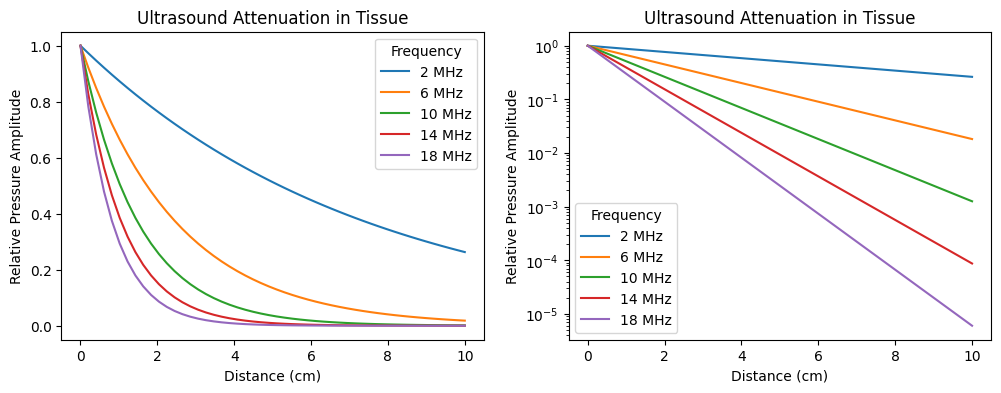

In [9]:
d = np.linspace(0, 10) # cm
fs = np.array([2, 6, 10, 14, 18]) # MHz

alpha_DB = 0.58
alpha = alpha_DB / 8.686 * fs[np.newaxis, :]
rel_p = np.exp(-alpha * d[:, np.newaxis])

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(d, rel_p)
plt.xlabel("Distance (cm)")
plt.ylabel("Relative Pressure Amplitude")
plt.title("Ultrasound Attenuation in Tissue")
plt.legend([f"{f} MHz" for f in fs], title="Frequency")

plt.subplot(122)
plt.semilogy(d, rel_p)
plt.xlabel("Distance (cm)")
plt.ylabel("Relative Pressure Amplitude")
plt.title("Ultrasound Attenuation in Tissue")
plt.legend([f"{f} MHz" for f in fs], title="Frequency")

It's possible but relatively tricky to modify the wave equation to take into account this dissipative loss. For our simulations' purposes, we'll take the easy route and assume that signals are  scaled by this exponential attenuation curve at the central frequency that we'll feed into the tissue.

# What about the skull?

So far, we've assumed that we're sending ultrasound through a homogeneous medium. However, if we needed to image through skull, or, more commonly, to focus ultrasound through skull to modulate neural activity (low-intensity focused ultrasound) or create targeted lesions (high-intensity focused ultrasound), we'd need heavier machinery to simulate wave propagation. The skull is much more rigid than the brain, and propagates sound at a much faster rate (~2800 m/s). Furthermore, the skull can propagate shear waves. The tissue-skull-brain interface creates reflections and distortions that must be accounted for to get the right wave propagation, which typically means obtaining an MRI to get the shape of the skull for a specific individual. 

One package that can simulate ultrasound propagation through the skull is [NTK](https://github.com/agencyenterprise/neurotechdevkit/tree/db908f66943ad4477a103dba5b8b5cb1c1690a11). They solve [this PDE through the Devito package](https://github.com/trustimaging/stride/blob/6fb1354c43667c07992f6b87fa9047e5c2066a2f/stride/physics/iso_acoustic/devito.py#L1517):

$$\boxed{\frac{\partial^2 p'}{\partial t^2} = c(x, y, z)^2 \nabla^2 p' - 2 \alpha c(x, y, z) \frac{\partial p'}{\partial t} }$$

Compared to our homogeneous equation:

* the speed of sound $c$ varies through space (non-homogeneous medium)
* the term $2 \alpha c(x, y, z) \frac{\partial p'}{\partial t}$ is a dissipation term. It's a phenomenological loss term that is frequency-independent. As such, $\alpha$ in this equation is selected to match the damping at the center frequency of the stimulation.

Solving this effectively requires sophisticated numerics, but the principles are similar to what we've covered here.

# References

* [Szabo 2013](https://www.amazon.com/Diagnostic-Ultrasound-Imaging-Biomedical-Engineering/dp/0123964873). Diagnostic Ultrasound: Inside Out.
* [Du, Jensen and Jensen 2013](https://www.sciencedirect.com/science/article/abs/pii/S0041624X13000619). Investigation of an angular spectrum approach for pulsed ultrasound fields.